In [1135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import datetime
from scipy.stats import pearsonr
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

# **Step 1 : Reading & Understanding data**

In [1136]:
# Read the data
bikesharing_inp = pd.read_csv(r"C:\Users\Anjali Verma\OneDrive\Desktop\Micky\Regression assignment\day.csv")

**Basic checks on data**

In [1137]:
bikesharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1138]:
# Checking number of records and columns
bikesharing_inp.shape

(730, 16)

In [1139]:
# Checking data type of columns and number of not null records
bikesharing_inp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


**Inference**:
-  Bike sharing dataset has total of 730 rows and 16 columns
-  Columns such as season, yr, mnth, holiday, weekday, workingday and weatehrsit are categorical variables but some kind of encoding is done for these columns
-  All columns have float/int datatype except dtdat which is object type


**Performing data quality checks**

Checking for missing values

In [1141]:
(bikesharing_inp.isnull().mean()/100).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

% of missing values:Row wise check

In [1142]:
(bikesharing_inp.isnull().mean(axis=1)/100).sort_values(ascending=False)

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

**Result Check**
-  There are no missing values either in rows or columns

Check for duplicates

In [1143]:
bike_duplicates = bikesharing_inp

In [1144]:
bike_duplicates.drop_duplicates(inplace=True)

In [1145]:
bike_duplicates.shape

(730, 16)

In [1146]:
bikesharing_inp.shape

(730, 16)

In [1147]:
bikesharing_inp.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


**Inference:** No duplicates found on the data

Check any junk values in the given dataframe; exclude instant column as it looks like Index for the given dataframe

In [1148]:
bikesharing_inp = bikesharing_inp.drop(["instant"], axis=1)

In [1149]:
# Checking for junk values in all columns
for i in bikesharing_inp.columns:
    print(bikesharing_inp[i].sort_values(ascending=False)) 

729    31-12-2019
364    31-12-2018
668    31-10-2019
303    31-10-2018
607    31-08-2019
          ...    
59     01-03-2018
396    01-02-2019
31     01-02-2018
365    01-01-2019
0      01-01-2018
Name: dteday, Length: 730, dtype: object
280    4
335    4
346    4
345    4
344    4
      ..
386    1
385    1
384    1
383    1
729    1
Name: season, Length: 730, dtype: int64
365    1
480    1
482    1
483    1
484    1
      ..
245    0
246    0
247    0
248    0
0      0
Name: yr, Length: 730, dtype: int64
729    12
335    12
337    12
338    12
339    12
       ..
370     1
369     1
368     1
367     1
365     1
Name: mnth, Length: 730, dtype: int64
415    1
359    1
247    1
610    1
512    1
      ..
246    0
248    0
249    0
250    0
729    0
Name: holiday, Length: 730, dtype: int64
0      6
259    6
217    6
224    6
231    6
      ..
344    0
351    0
358    0
609    0
365    0
Name: weekday, Length: 730, dtype: int64
729    1
612    1
370    1
369    1
368    1
      ..
1    

**Inference:** No junk values found in dataset

**Exploratory data analysis**

Analysis of ride count average across all the days

In [1150]:
bikesharing_inp['date'] = bikesharing_inp['dteday'].apply(lambda x: int(x.split('-')[0]))

In [1151]:
date_dist = round(bikesharing_inp.groupby(by='date').cnt.mean()/len(bikesharing_inp), 2)
date_dist.head()

date
1    5.92
2    6.01
3    6.37
4    6.41
5    6.23
Name: cnt, dtype: float64

In [1152]:
def plot_bar_graph(data, graph_title, x_axis_label, y_axis_label, x_label_rotation=0,x_text=None):
    fig, ax = plt.subplots(figsize=(15,8))
    graph_data = sns.barplot(x=data.index, y=data.values)
    graph_data_label = data.max()*0.01
    for index, value in enumerate(data.iteritems()):
        graph_data.text(index, value[1] + graph_data_label, round(value[1], 2), color='black', ha="center", rotation='horizontal')       
    if x_text is None:
        graph_data.set_xticklabels(graph_data.get_xticklabels(), rotation=x_label_rotation)
    else:
        graph_data.set_xticklabels(x_text, rotation=x_label_rotation)
    plt.title(graph_title, fontdict={'fontsize': 25})
    plt.xlabel(x_axis_label)
    plt.ylabel(y_axis_label)
    plt.show()

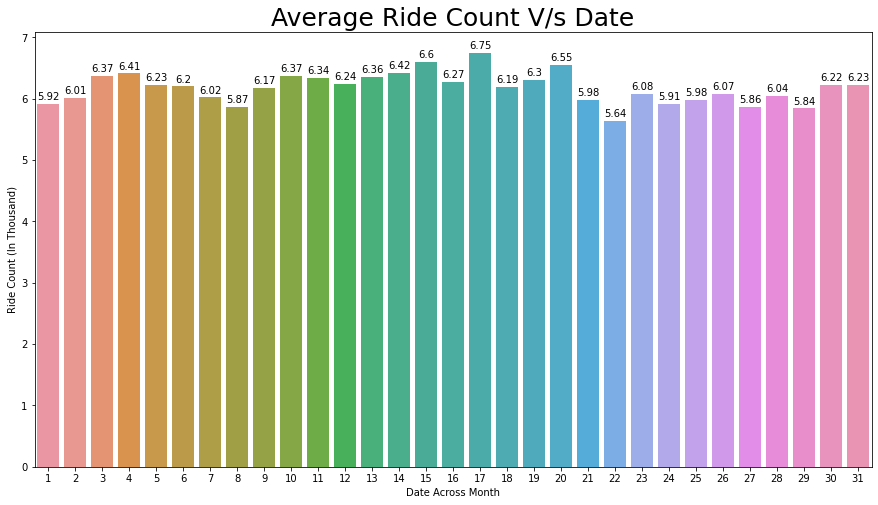

In [1153]:
plot_bar_graph(data=date_dist, graph_title='Average Ride Count V/s Date', x_axis_label='Date Across Month',
                        y_axis_label='Ride Count (In Thousand)', x_label_rotation=0)

**Inference:** We could not infer any significant insights,while visualizing the date data.

Analysis of ride count average across month

In [1154]:
bikesharing_inp.mnth.describe()

count    730.000000
mean       6.526027
std        3.450215
min        1.000000
25%        4.000000
50%        7.000000
75%       10.000000
max       12.000000
Name: mnth, dtype: float64

**Inference:** Month column is varied between 1 and 12 which are properly defined in data dictionary, hence we can proceed ahead with this column without dropping / changing any records

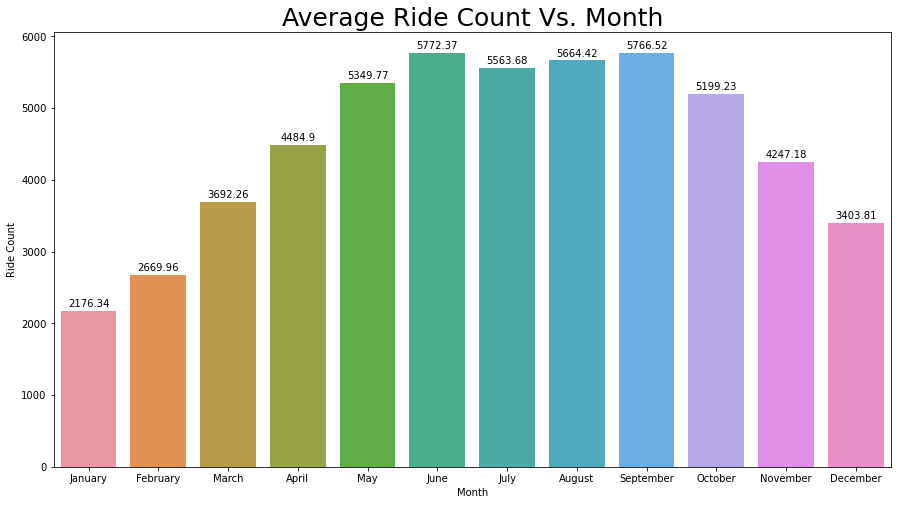

In [1155]:
month_dist = bikesharing_inp.groupby(by='mnth').cnt.mean()
plot_bar_graph(data=month_dist, graph_title='Average Ride Count Vs. Month', x_axis_label='Month',
                        y_axis_label='Ride Count', x_label_rotation=0,
                        x_text=[datetime.date(1900, i , 1).strftime('%B') for i in range(1, 13)])

**Inference:** We see that number of Ride Count drastically increases between May to October

Analysis of ride count average across days of the week

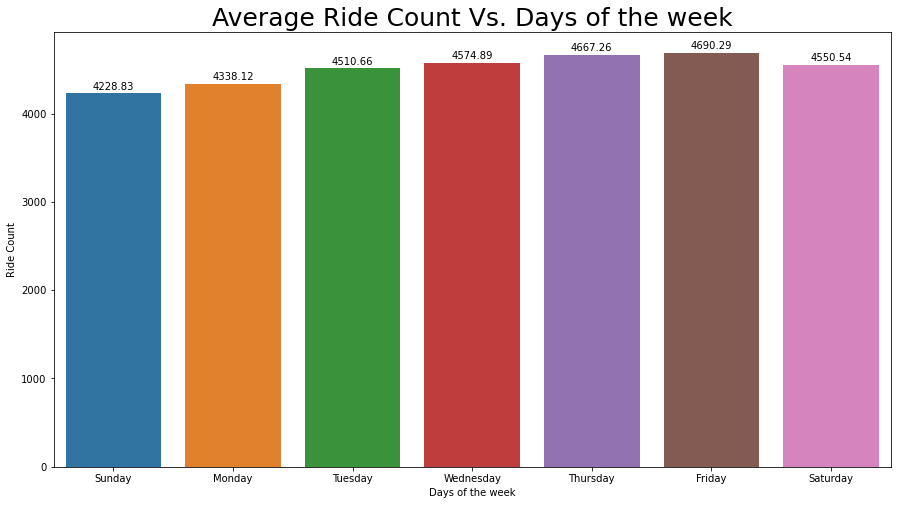

In [1156]:
weekday_dist = bikesharing_inp.groupby(by='weekday').cnt.mean()
plot_bar_graph(data=weekday_dist, graph_title='Average Ride Count Vs. Days of the week', x_axis_label='Days of the week',
                        y_axis_label='Ride Count', x_label_rotation=0, 
                        x_text=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

**Inference:** We see that number of Ride Count is highest between wednesday to friday during middle of working weeks which shows most of the people rented bikes for work as the number is quite low on sundays.

Impact of Weather on bike ride

In [1157]:
bikesharing_inp.groupby(by='weathersit').weathersit.count().sort_values(ascending=False)

weathersit
1    463
2    246
3     21
Name: weathersit, dtype: int64

Above data is a Categorical Nomimal Variable where every number is mapped as follows
-  1-clear
-  2-mist
-  3-light

In [1158]:
bikesharing_inp['weathersit'] = bikesharing_inp.weathersit.map({1: 'clear', 2: 'mist', 3: 'light', 4: 'heavy'})
bikesharing_inp.groupby(by='weathersit').weathersit.count().sort_values(ascending=False)

weathersit
clear    463
mist     246
light     21
Name: weathersit, dtype: int64

Let''s plot distrubution of Ride Count Mean Across Weather Situation

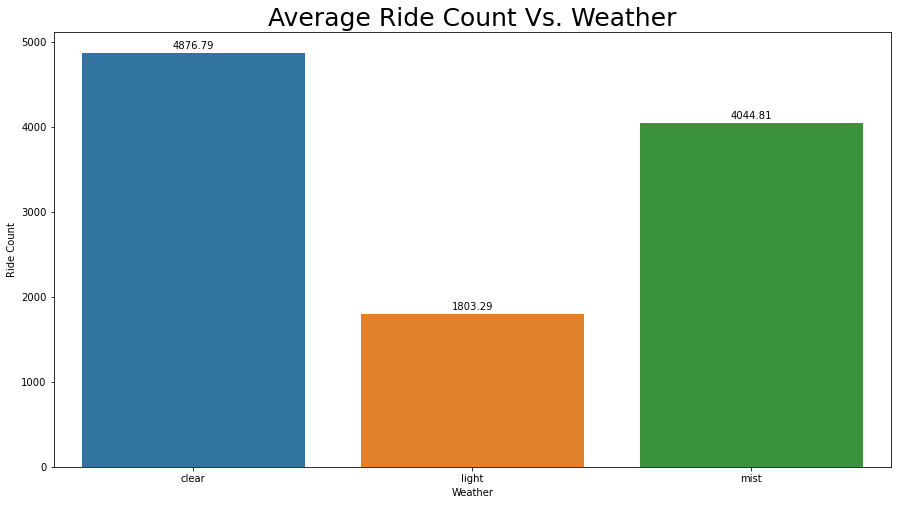

In [1159]:
weathersit_dist = bikesharing_inp.groupby(by='weathersit').cnt.mean()
plot_bar_graph(data=weathersit_dist, graph_title='Average Ride Count Vs. Weather', x_axis_label='Weather',
                        y_axis_label='Ride Count',  x_label_rotation=0)

In [1160]:
bikesharing_inp.temp.describe()

count    730.000000
mean      20.319259
std        7.506729
min        2.424346
25%       13.811885
50%       20.465826
75%       26.880615
max       35.328347
Name: temp, dtype: float64

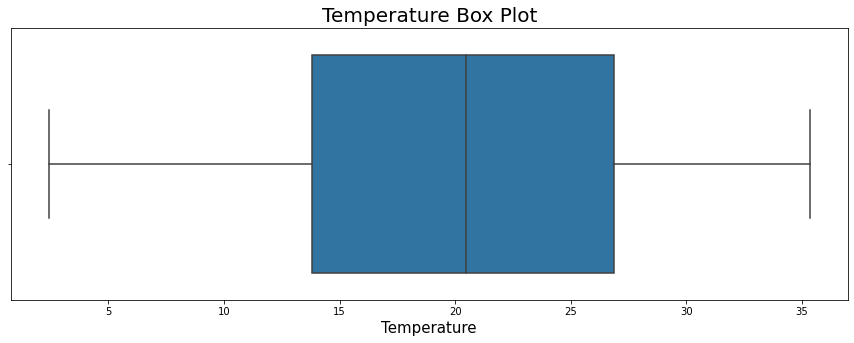

In [1161]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=bikesharing_inp, x='temp')
plt.title('Temperature Box Plot', fontdict={'fontsize': 20})
plt.xlabel('Temperature', fontdict={'fontsize': 15})
plt.show()

**Inference:** Temperature column is varied between a range which seems to be valid range, hence we can proceed ahead with this column without dropping / changing any records

In [1162]:
bikesharing_inp.hum.describe()

count    730.000000
mean      62.765175
std       14.237589
min        0.000000
25%       52.000000
50%       62.625000
75%       72.989575
max       97.250000
Name: hum, dtype: float64

Text(0.5, 0, 'Temperature')

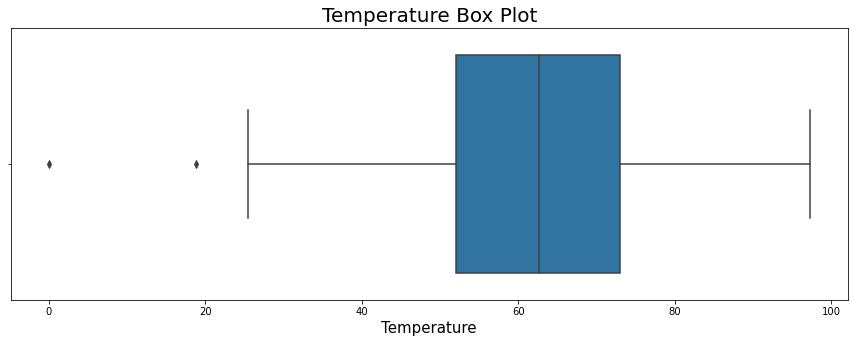

In [1163]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=bikesharing_inp, x='hum')
plt.title('Temperature Box Plot', fontdict={'fontsize': 20})
plt.xlabel('Temperature', fontdict={'fontsize': 15})

**Visualising numeric variables**

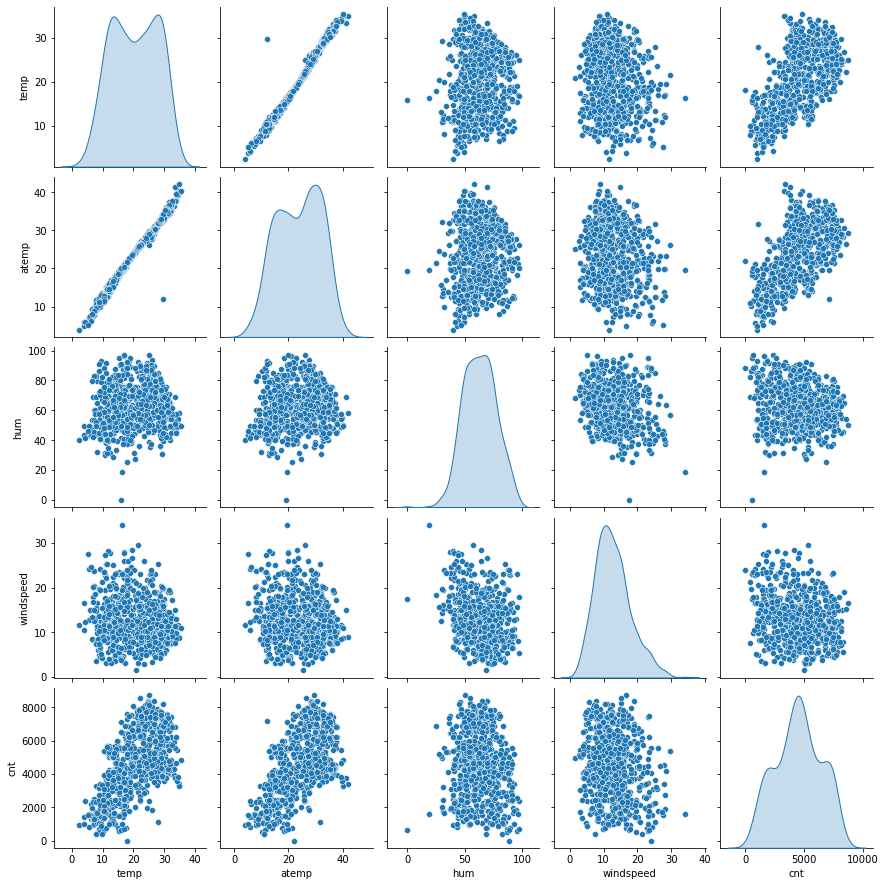

In [1164]:
# Creating pairplot of numeric variables
bike_num=bikesharing_inp[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

**Inference:** Pair-Plot depicts linear relation between temp,atemp and cnt

**Removing unwanted columns from the dataframe**

In [1165]:
bikesharing_inp.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'date'],
      dtype='object')

Variables that we can remove from our analysis includes:
-  instant: its an index column that doesnot have any busienss significance
-  dteday: There is already a column named year & month that exists, hence dteday can be removed
-  casual & registered: these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns. More over, we have created a new variable to have the ratio of these customer types. 

In [1166]:
# creating new variable named bike
bike=bikesharing_inp[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [1167]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 90.3+ KB


In [1168]:
bike.describe()

,season,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


**Creating dummy variables - For 4 categorical variables mnth, weekday, season & weathersit**

In [1169]:
# Converting columns to category data types
bike['season']=bike['season'].astype('category')
bike['weathersit']=bike['weathersit'].astype('category')
bike['mnth']=bike['mnth'].astype('category')
bike['weekday']=bike['weekday'].astype('category')

In [1170]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 71.4 KB


In [1171]:
# 1) Create Dummy variable
# 2) Drop original variable for which the dummy that was created
# 3) Drop first dummy variable for each set of dummies created.(we need only n-1 column if we have n columns)

bike = pd.get_dummies(bike, drop_first=True)
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   yr                730 non-null    int64  
 1   holiday           730 non-null    int64  
 2   workingday        730 non-null    int64  
 3   temp              730 non-null    float64
 4   atemp             730 non-null    float64
 5   hum               730 non-null    float64
 6   windspeed         730 non-null    float64
 7   cnt               730 non-null    int64  
 8   season_2          730 non-null    uint8  
 9   season_3          730 non-null    uint8  
 10  season_4          730 non-null    uint8  
 11  mnth_2            730 non-null    uint8  
 12  mnth_3            730 non-null    uint8  
 13  mnth_4            730 non-null    uint8  
 14  mnth_5            730 non-null    uint8  
 15  mnth_6            730 non-null    uint8  
 16  mnth_7            730 non-null    uint8  
 1

**Splitting the data into train & test**

In [1172]:
df_train, df_test = train_test_split(bike, train_size = 0.70, random_state = 100)

In [1173]:
# Checking shape of test and train data
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


In [1174]:
# Check train and test info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   yr                510 non-null    int64  
 1   holiday           510 non-null    int64  
 2   workingday        510 non-null    int64  
 3   temp              510 non-null    float64
 4   atemp             510 non-null    float64
 5   hum               510 non-null    float64
 6   windspeed         510 non-null    float64
 7   cnt               510 non-null    int64  
 8   season_2          510 non-null    uint8  
 9   season_3          510 non-null    uint8  
 10  season_4          510 non-null    uint8  
 11  mnth_2            510 non-null    uint8  
 12  mnth_3            510 non-null    uint8  
 13  mnth_4            510 non-null    uint8  
 14  mnth_5            510 non-null    uint8  
 15  mnth_6            510 non-null    uint8  
 16  mnth_7            510 non-null    uint8  


In [1175]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   yr                220 non-null    int64  
 1   holiday           220 non-null    int64  
 2   workingday        220 non-null    int64  
 3   temp              220 non-null    float64
 4   atemp             220 non-null    float64
 5   hum               220 non-null    float64
 6   windspeed         220 non-null    float64
 7   cnt               220 non-null    int64  
 8   season_2          220 non-null    uint8  
 9   season_3          220 non-null    uint8  
 10  season_4          220 non-null    uint8  
 11  mnth_2            220 non-null    uint8  
 12  mnth_3            220 non-null    uint8  
 13  mnth_4            220 non-null    uint8  
 14  mnth_5            220 non-null    uint8  
 15  mnth_6            220 non-null    uint8  
 16  mnth_7            220 non-null    uint8  


**Checking Correlation between variables**

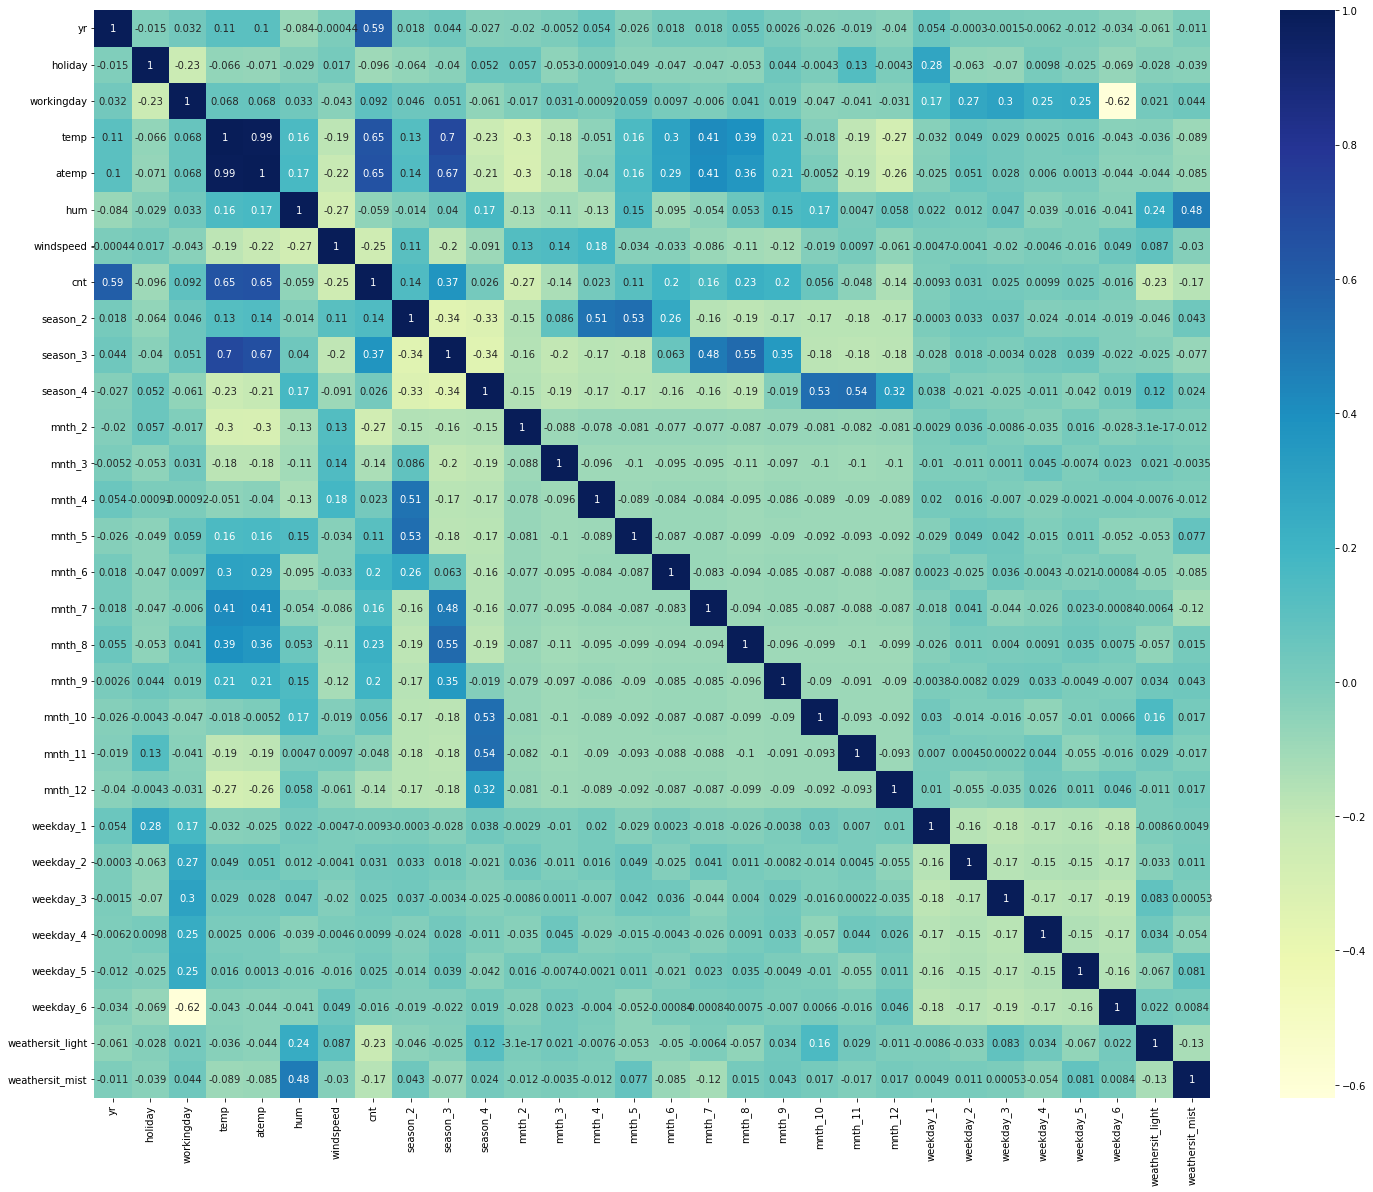

In [1176]:
plt.figure(figsize = (25,20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

**Inference:**
-  temp, yr, season_3 shows good correlation with target variable cnt

-  The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable.
-  We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model

Scaling the features - using MinMaxScaler

In [1177]:
scaler = MinMaxScaler()
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_light,weathersit_mist
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,0,0,0,0,0,0,0,1,0,1
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,1,0,...,0,0,0,0,0,0,0,1,0,1
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,1,0,...,0,0,0,0,0,0,1,0,0,1


In [1178]:
# Apply scaler() to all the numeric variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_light,weathersit_mist
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,1,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,1,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,1,0,...,0,0,0,0,0,0,1,0,0,1


In [1179]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_light,weathersit_mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.247059,0.262745,...,0.086275,0.084314,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.431725,0.440557,...,0.281045,0.278131,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Inference:** We see features temp, atemp, hum, windspeed, cnt got rescaled from original values to 0 and 1's.

**Building a linear model**

Fixing Trained Target Variable

In [1180]:
y_train = df_train.pop('cnt')

Fixing Trained Feature(s) Variable

In [1181]:
X_train = df_train

-  Using RFE (Recursive Feature Elimination) method to provide set of variables ranked in an order of importance (of impacting outcome)
-  Passing an arbitary number (here 15), which means the method will rank first 15 predictors as 1 & remaining as 0. Creating a generalised function for evaluating Variance Inflation Factor

In [1182]:
lm = LinearRegression()
lm.fit(X_train, y_train)


LinearRegression()

In [1183]:
rfe = RFE(lm, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [1184]:
rfe_df = pd.DataFrame({'Predictor': X_train.columns, 'Select Status': rfe.support_, 'Ranking': rfe.ranking_})
rfe_df.sort_values(by='Ranking')

,Predictor,Select Status,Ranking
0,yr,True,1
26,weekday_6,True,1
18,mnth_10,True,1
17,mnth_9,True,1
16,mnth_8,True,1
27,weathersit_light,True,1
9,season_4,True,1
8,season_3,True,1
28,weathersit_mist,True,1
6,windspeed,True,1


# Model building process - 1

In [1185]:
col = X_train.columns[rfe.support_]

X_train_rfe = X_train[col]

X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     183.9
Date:                Sun, 06 Nov 2022   Prob (F-statistic):          5.17e-191
Time:                        16:35:53   Log-Likelihood:                 519.44
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1952      0.029      6.790      0.000       0.139       0.252
yr                   0.2301      0.008     28.743      0.000       0.214       0.246
holiday             -0.0545      0.027     -2.025      0.043      -0.107      -0.002
workingday           0.0445      0.012      3.856      0.000       0.022       0.067
temp                 0.4972      0.034     14.821      0.000       0.431       0.563
hum                 -0.1639      0.037     -4.395      0.000      -0.237      -0.091
windspeed           -0.1825      0.025     -7.196      0.000      -0.232      -0.133
season_2             0.1183      0.015      8.038      0.000       0.089       0.147
season_3             0.0292      0.022      1.329      0.184      -0.014       0.072
season_4             0.1430      0.013     10.671      0.000       0.117       0.169
mnth_8               0.0473      0.017      2.732      0.007       0.013       0.081
mnth_9               0.1176      0.017      6.876      0.000       0.084       0.151
mnth_10              0.0416      0.017      2.391      0.017       0.007       0.076
weekday_6            0.0531      0.015      3.655      0.000       0.025       0.082
weathersit_light    -0.2507      0.026     -9.579      0.000      -0.302      -0.199
weathersit_mist     -0.0577      0.010     -5.564      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       76.225   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.955
Skew:                          -0.743   Prob(JB):                     1.40e-44
Kurtosis:                       5.701   Cond. No.                         21.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

VIF Check

In [1186]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,24.07
4,hum,17.44
7,season_3,8.19
2,workingday,5.05
5,windspeed,3.88
6,season_2,3.46
8,season_4,2.85
14,weathersit_mist,2.15
0,yr,2.04
12,weekday_6,1.91


**Inference:** In the above model we see high p- value for "season_3" which make its co-efficient insignificant. We will proceed ahead with dropping this feature and designing model again

Model - 2

In [1187]:
col = col.drop(['season_3'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr2 = sm.OLS(y_train, X_train_sm)
lr_model_2 = lr2.fit()
lr_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.6
Date:                Sun, 06 Nov 2022   Prob (F-statistic):          8.70e-192
Time:                        16:35:53   Log-Likelihood:                 518.52
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1948      0.029      6.769      0.000       0.138       0.251
yr                   0.2292      0.008     28.712      0.000       0.214       0.245
holiday             -0.0557      0.027     -2.069      0.039      -0.109      -0.003
workingday           0.0442      0.012      3.829      0.000       0.022       0.067
temp                 0.5309      0.022     24.146      0.000       0.488       0.574
hum                 -0.1708      0.037     -4.620      0.000      -0.243      -0.098
windspeed           -0.1858      0.025     -7.353      0.000      -0.235      -0.136
season_2             0.1049      0.011      9.778      0.000       0.084       0.126
season_4             0.1349      0.012     11.306      0.000       0.111       0.158
mnth_8               0.0557      0.016      3.457      0.001       0.024       0.087
mnth_9               0.1252      0.016      7.757      0.000       0.093       0.157
mnth_10              0.0385      0.017      2.230      0.026       0.005       0.072
weekday_6            0.0527      0.015      3.627      0.000       0.024       0.081
weathersit_light    -0.2470      0.026     -9.484      0.000      -0.298      -0.196
weathersit_mist     -0.0568      0.010     -5.482      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       70.710   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.743
Skew:                          -0.710   Prob(JB):                     4.18e-39
Kurtosis:                       5.511   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1188]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,16.57
3,temp,10.01
2,workingday,5.05
5,windspeed,3.83
7,season_4,2.25
13,weathersit_mist,2.14
0,yr,2.03
11,weekday_6,1.90
6,season_2,1.84
10,mnth_10,1.61


**Inference:** Variable hum has higher VIF value, hence dropping this and analyzing the model

Model 3

In [1189]:
col = col.drop(['hum'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr3 = sm.OLS(y_train, X_train_sm)
lr3_model = lr3.fit()
lr3_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.8
Date:                Sun, 06 Nov 2022   Prob (F-statistic):          1.97e-188
Time:                        16:35:53   Log-Likelihood:                 507.76
No. Observations:                 510   AIC:                            -987.5
Df Residuals:                     496   BIC:                            -928.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0937      0.019      4.914      0.000       0.056       0.131
yr                   0.2331      0.008     28.769      0.000       0.217       0.249
holiday             -0.0541      0.027     -1.971      0.049      -0.108      -0.000
workingday           0.0473      0.012      4.026      0.000       0.024       0.070
temp                 0.5106      0.022     23.229      0.000       0.467       0.554
windspeed           -0.1530      0.025     -6.183      0.000      -0.202      -0.104
season_2             0.1019      0.011      9.325      0.000       0.080       0.123
season_4             0.1267      0.012     10.524      0.000       0.103       0.150
mnth_8               0.0539      0.016      3.281      0.001       0.022       0.086
mnth_9               0.1185      0.016      7.226      0.000       0.086       0.151
mnth_10              0.0343      0.018      1.950      0.052      -0.000       0.069
weekday_6            0.0578      0.015      3.912      0.000       0.029       0.087
weathersit_light    -0.2929      0.025    -11.930      0.000      -0.341      -0.245
weathersit_mist     -0.0840      0.009     -9.676      0.000      -0.101      -0.067
==============================================================================
Omnibus:                       69.409   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.594
Skew:                          -0.699   Prob(JB):                     3.32e-38
Kurtosis:                       5.484   Cond. No.                         12.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1190]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.39
2,workingday,4.40
4,windspeed,3.60
0,yr,2.02
6,season_4,2.00
5,season_2,1.83
10,weekday_6,1.77
9,mnth_10,1.60
7,mnth_8,1.59
12,weathersit_mist,1.55


**Inference:** In above model, the p-value is higher for variable "mnth_10", we wll drop these and analyse the model.

Model 4

In [1191]:
col = col.drop(['mnth_10'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr4 = sm.OLS(y_train, X_train_sm)
lr4_model = lr4.fit()
lr4_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.0
Date:                Sun, 06 Nov 2022   Prob (F-statistic):          8.64e-189
Time:                        16:35:53   Log-Likelihood:                 505.81
No. Observations:                 510   AIC:                            -985.6
Df Residuals:                     497   BIC:                            -930.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0903      0.019      4.740      0.000       0.053       0.128
yr                   0.2327      0.008     28.651      0.000       0.217       0.249
holiday             -0.0560      0.028     -2.036      0.042      -0.110      -0.002
workingday           0.0463      0.012      3.933      0.000       0.023       0.069
temp                 0.5188      0.022     23.980      0.000       0.476       0.561
windspeed           -0.1508      0.025     -6.085      0.000      -0.200      -0.102
season_2             0.1004      0.011      9.183      0.000       0.079       0.122
season_4             0.1382      0.011     13.148      0.000       0.118       0.159
mnth_8               0.0510      0.016      3.104      0.002       0.019       0.083
mnth_9               0.1136      0.016      6.991      0.000       0.082       0.146
weekday_6            0.0569      0.015      3.842      0.000       0.028       0.086
weathersit_light    -0.2872      0.024    -11.749      0.000      -0.335      -0.239
weathersit_mist     -0.0830      0.009     -9.555      0.000      -0.100      -0.066
==============================================================================
Omnibus:                       61.225   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.277
Skew:                          -0.644   Prob(JB):                     2.10e-31
Kurtosis:                       5.234   Cond. No.                         12.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1192]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.20
2,workingday,4.35
4,windspeed,3.60
0,yr,2.02
5,season_2,1.82
9,weekday_6,1.76
7,mnth_8,1.58
11,weathersit_mist,1.54
6,season_4,1.52
8,mnth_9,1.31


Model 5

In [1193]:
col = col.drop(['holiday'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr5 = sm.OLS(y_train, X_train_sm)
lr5_model = lr5.fit()
lr5_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     234.9
Date:                Sun, 06 Nov 2022   Prob (F-statistic):          4.31e-189
Time:                        16:36:15   Log-Likelihood:                 503.70
No. Observations:                 510   AIC:                            -983.4
Df Residuals:                     498   BIC:                            -932.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0809      0.019      4.365      0.000       0.045       0.117
yr                   0.2328      0.008     28.578      0.000       0.217       0.249
workingday           0.0546      0.011      4.926      0.000       0.033       0.076
temp                 0.5208      0.022     24.022      0.000       0.478       0.563
windspeed           -0.1518      0.025     -6.105      0.000      -0.201      -0.103
season_2             0.1010      0.011      9.220      0.000       0.080       0.123
season_4             0.1379      0.011     13.083      0.000       0.117       0.159
mnth_8               0.0512      0.016      3.111      0.002       0.019       0.084
mnth_9               0.1117      0.016      6.864      0.000       0.080       0.144
weekday_6            0.0653      0.014      4.576      0.000       0.037       0.093
weathersit_light    -0.2860      0.025    -11.664      0.000      -0.334      -0.238
weathersit_mist     -0.0826      0.009     -9.474      0.000      -0.100      -0.065
==============================================================================
Omnibus:                       65.886   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.448
Skew:                          -0.676   Prob(JB):                     3.92e-35
Kurtosis:                       5.373   Cond. No.                         11.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1194]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.10
1,workingday,4.04
3,windspeed,3.49
0,yr,2.02
4,season_2,1.82
8,weekday_6,1.69
6,mnth_8,1.58
10,weathersit_mist,1.54
5,season_4,1.51
7,mnth_9,1.30


In [1195]:
lr5_model.params

const               0.080941
yr                  0.232844
workingday          0.054605
temp                0.520838
windspeed          -0.151781
season_2            0.101039
season_4            0.137942
mnth_8              0.051225
mnth_9              0.111729
weekday_6           0.065324
weathersit_light   -0.285973
weathersit_mist    -0.082579
dtype: float64

**Inference:** This model looks good, as there seems to be Very Low Multicollinearity between the predictors and the p-values for all the predictors seems to be significantly low. Though we have VIF as 6.10 for "Temp" variable this seems to be important in this analysis, hence we will continue with this variable and model. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number).

# Final Model Interpretation For Linear Regrssion Assumptions

As per hypothesis testing:
-  **Null Hypothesis:** H0:B1=B2=...=Bn=0 (Here co-efficients will be equal to zero)
-  **Alternate Hyposthesis** H1: at least one B(i) != 0 (Atleast one co-efficients will not be equal to Zero)

As per model 5, as all coeeficients are not equal to 0 that means **NULL HYPOTHESIS CAN BE REJECTED**

In [1196]:
lr5_model.params

const               0.080941
yr                  0.232844
workingday          0.054605
temp                0.520838
windspeed          -0.151781
season_2            0.101039
season_4            0.137942
mnth_8              0.051225
mnth_9              0.111729
weekday_6           0.065324
weathersit_light   -0.285973
weathersit_mist    -0.082579
dtype: float64

Equaltion of best fitted linear model is given by:
-  **CNT(Target Varibale) = 0.080941 + (yr × 0.232844) + (workingday * 0.054605) + (temp * 0.520838) - (windspeed * 0.151781) + (season_2 * 0.101039) + (season_4 * 0.137942) + (mnth_8 * 0.051225) + (mnth_9 * 0.111729) + (weekday_6 * 0.065324) - (weathersit_light * 0.285973) - (weathersit_mist * 0.082579)**

Residual Analysis of the train data

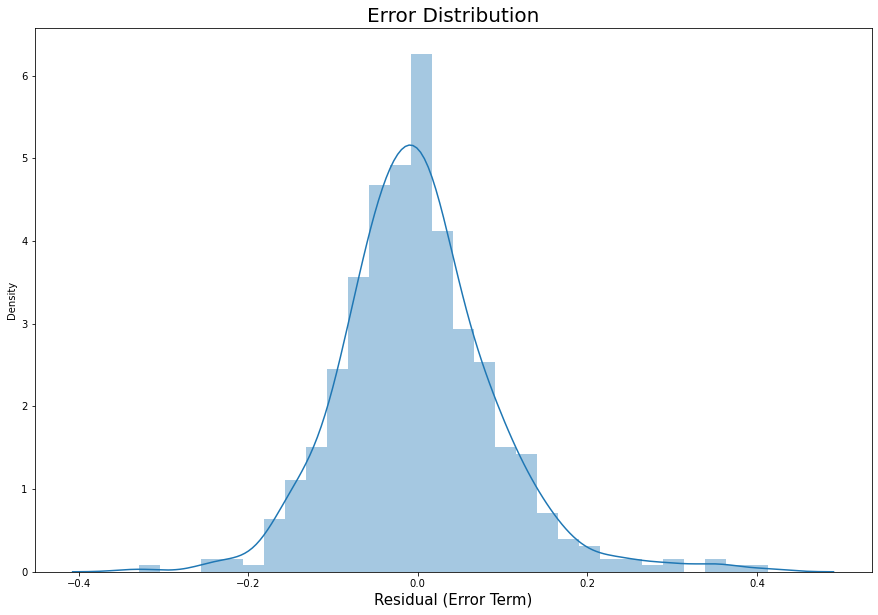

In [1197]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
y_train_pred = lr5_model.predict(X_train_sm)
residual = y_train_pred - y_train
plt.xlabel('Residual (Error Term)', fontdict={'fontsize': 15})
plt.title('Error Distribution', fontdict={'fontsize': 20})
sns.distplot(residual,ax=ax)
plt.show()

**Inference:** Error Distribution Is Normallly Distributed around mean, which indicates that model has handled the assumption of Error Normal Distribution properly

**Validating homoscedasticity**

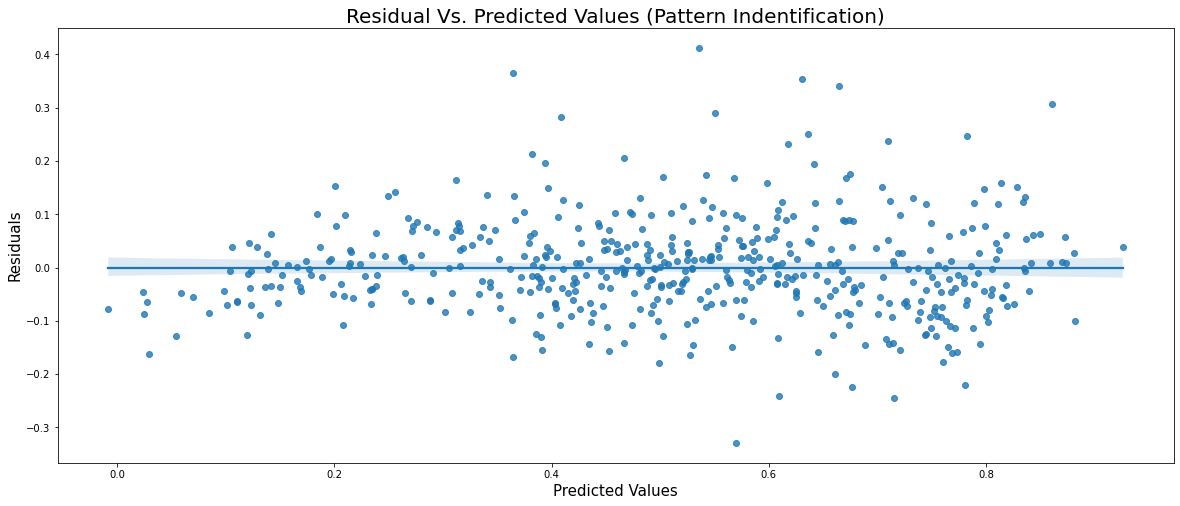

In [1198]:
fig_dims = (20, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.regplot(x=y_train_pred, y=residual,ax=ax)
plt.title('Residual Vs. Predicted Values (Pattern Indentification)', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()

In [1199]:
print("Pearson Value for Predicted Value Against Residual ==>", pearsonr(y_train_pred, residual)[0])

Pearson Value for Predicted Value Against Residual ==> 9.50194783966296e-16


Validating Independence of residuals

In [1236]:
print('The Durbin-Watson value for Final Model lr 5 is',round(sm.stats.stattools.durbin_watson((y_train - y_train_pred)),2))

The Durbin-Watson value for Final Model lr 5 is 2.05


**Inference:** Above graph indicates, there is no relation between Residual & Predicted Value. This is what is expected from the model to not have specific pattern. This describes homoscedasticity.

**Validating Linearity**

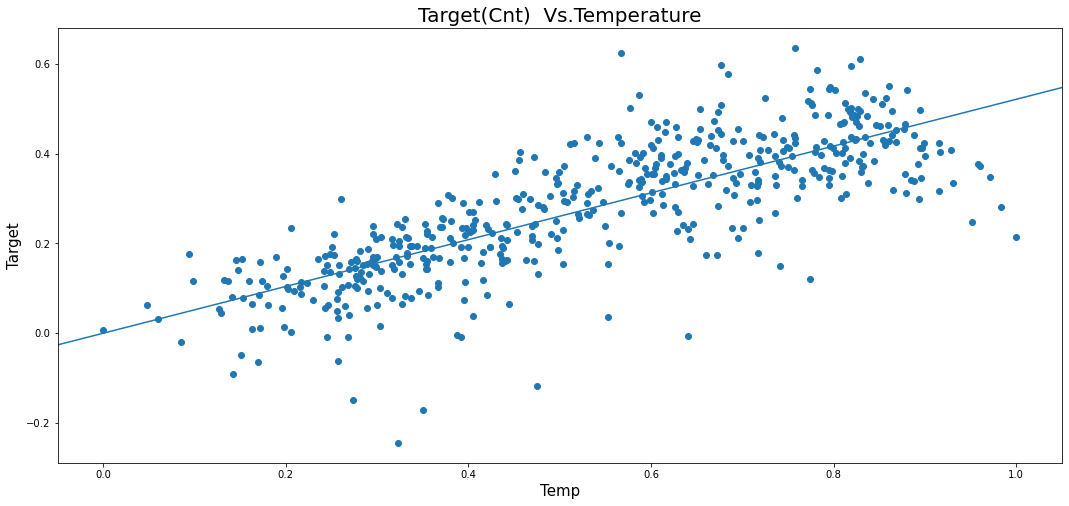

In [1203]:
fig_dims = (18, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sm.graphics.plot_ccpr(lr5_model, 'temp',ax=ax)
plt.title('Target(Cnt)  Vs.Temperature', fontdict={'fontsize': 20})
plt.xlabel('Temp', fontdict={'fontsize': 15})
plt.ylabel('Target', fontdict={'fontsize': 15})
plt.show()

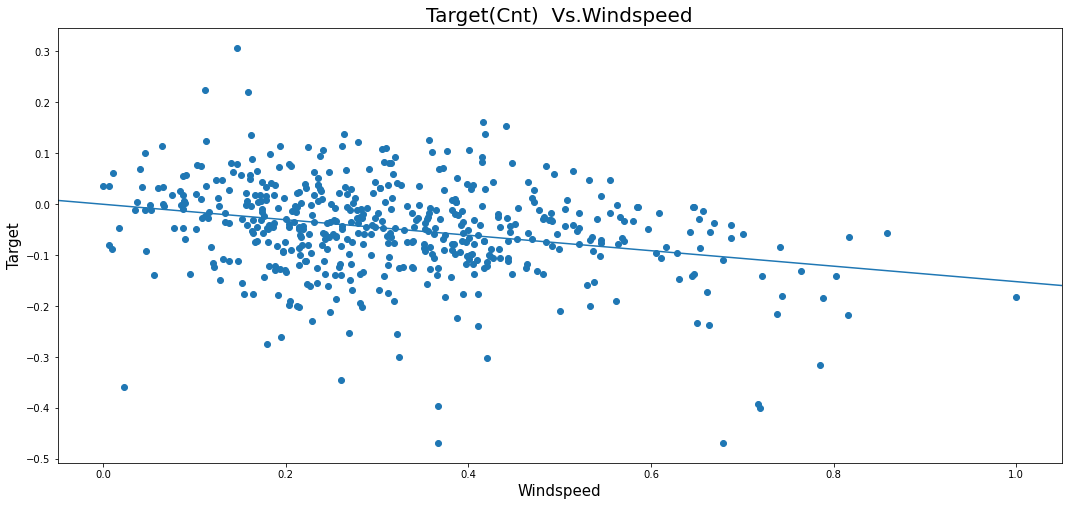

In [1204]:
fig_dims = (18, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sm.graphics.plot_ccpr(lr5_model, 'windspeed', ax=ax)
plt.title('Target(Cnt)  Vs.Windspeed', fontdict={'fontsize': 20})
plt.xlabel('Windspeed', fontdict={'fontsize': 15})
plt.ylabel('Target', fontdict={'fontsize': 15})
plt.show()

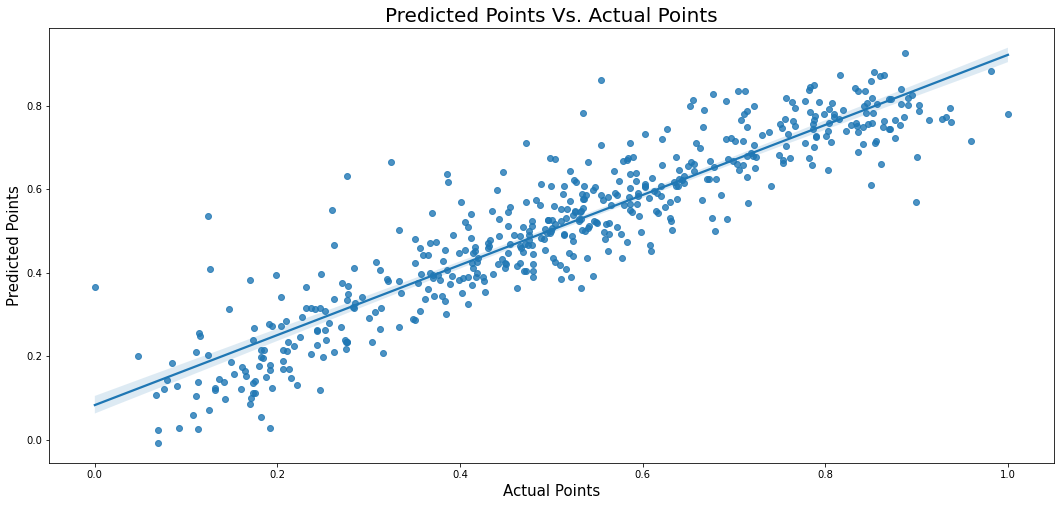

In [1205]:
fig_dims = (18, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.regplot(x=y_train, y=y_train_pred, ax=ax)
plt.title('Predicted Points Vs. Actual Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Points', fontdict={'fontsize': 15})
plt.show()

**Inference:** Above graph shows, residuals are equal distributed across predicted value. This means equal variance and can not observe high concentration of data points in certain region & low concentarion in certain regions.
This proves Homoscedasticity of Error Terms

**Validating Absence of Multicolinearity**

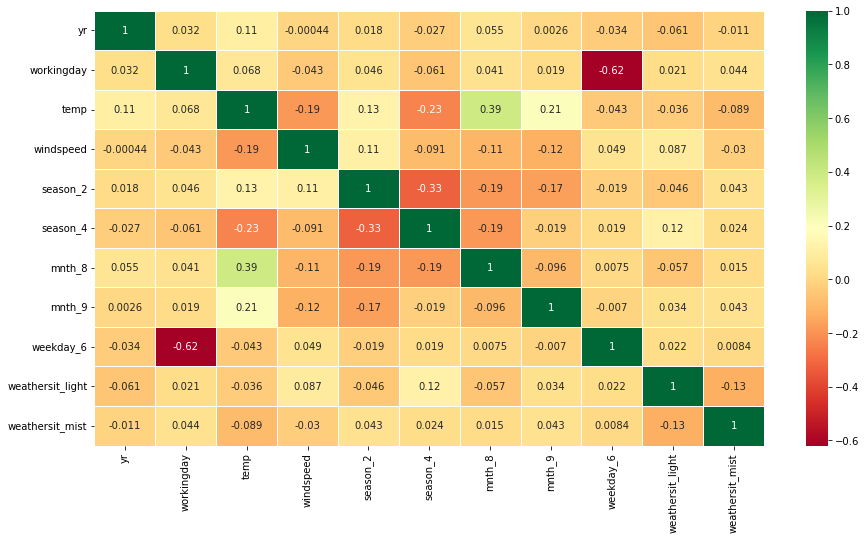

In [1206]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_rfe.corr(),annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

**R Sqaure Observation for Train Data**

In [1233]:
from sklearn.metrics import r2_score,mean_squared_error

r2_score_train_df = r2_score(y_train, y_train_pred)
r2_score_train_df

0.8384155133798845

In [1227]:
X_train.shape

(510, 29)

In [1228]:
n= X_train.shape[0]
n

510

In [1229]:
p = X_train.shape[1]
p

29

In [1232]:
adjusted_r2 = 1-(1-r2_score_train_df)*(n-1)/(n-p-1)
adjusted_r2

0.8286531173132525

**Predicting on Test Data**

In [1208]:
df_test[num_vars].head(10)

,temp,atemp,hum,windspeed,cnt
184,29.793347,33.27085,63.7917,5.459106,6043
535,32.082500,36.04875,59.2083,7.625404,6211
299,19.270000,22.85230,81.2917,13.250121,2659
221,31.433347,34.24915,42.4167,13.417286,4780
152,29.315000,32.19710,30.5000,19.583229,4968
404,10.865000,13.09940,56.2083,13.000479,3830
198,30.613347,35.19625,65.1250,14.458868,4458
171,27.914153,31.88230,77.0417,11.458675,4835
512,29.212500,33.96500,67.6250,13.166907,6043
200,31.501653,37.34250,70.7083,7.625739,4332


In [1209]:
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_light,weathersit_mist
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,...,0,0,0,0,0,1,0,0,0,0


In [1210]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_light,weathersit_mist
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.263636,0.245455,...,0.072727,0.086364,0.127273,0.168182,0.100000,0.163636,0.177273,0.118182,0.027273,0.318182
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.441609,0.431338,...,0.260281,0.281541,0.334038,0.374881,0.300684,0.370789,0.382770,0.323559,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Fixing Test Target Variable

In [1211]:
y_test = df_test.pop('cnt')

Fixing Test Feature(s) Variable

In [1212]:
X_test = df_test

In [1213]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   yr                220 non-null    int64  
 1   holiday           220 non-null    int64  
 2   workingday        220 non-null    int64  
 3   temp              220 non-null    float64
 4   atemp             220 non-null    float64
 5   hum               220 non-null    float64
 6   windspeed         220 non-null    float64
 7   season_2          220 non-null    uint8  
 8   season_3          220 non-null    uint8  
 9   season_4          220 non-null    uint8  
 10  mnth_2            220 non-null    uint8  
 11  mnth_3            220 non-null    uint8  
 12  mnth_4            220 non-null    uint8  
 13  mnth_5            220 non-null    uint8  
 14  mnth_6            220 non-null    uint8  
 15  mnth_7            220 non-null    uint8  
 16  mnth_8            220 non-null    uint8  


Filtering Test Input (Reserving Required Features)

In [1214]:
X_test_new = X_test[X_train_rfe.columns]
X_test_new = sm.add_constant(X_test_new)
X_test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   const             220 non-null    float64
 1   yr                220 non-null    int64  
 2   workingday        220 non-null    int64  
 3   temp              220 non-null    float64
 4   windspeed         220 non-null    float64
 5   season_2          220 non-null    uint8  
 6   season_4          220 non-null    uint8  
 7   mnth_8            220 non-null    uint8  
 8   mnth_9            220 non-null    uint8  
 9   weekday_6         220 non-null    uint8  
 10  weathersit_light  220 non-null    uint8  
 11  weathersit_mist   220 non-null    uint8  
dtypes: float64(3), int64(2), uint8(7)
memory usage: 11.8 KB


In [1215]:
X_test_new.head()

,const,yr,workingday,temp,windspeed,season_2,season_4,mnth_8,mnth_9,weekday_6,weathersit_light,weathersit_mist
184,1.0,0,0,0.831783,0.084219,0,0,0,0,0,0,1
535,1.0,1,1,0.901354,0.153728,1,0,0,0,0,0,0
299,1.0,0,1,0.511964,0.334206,0,1,0,0,0,0,1
221,1.0,0,1,0.881625,0.339570,0,0,1,0,0,0,0
152,1.0,0,1,0.817246,0.537414,1,0,0,0,0,0,0


Predicting Test Data Using Developed Model

In [1216]:
y_pred = lr5_model.predict(X_test_new)

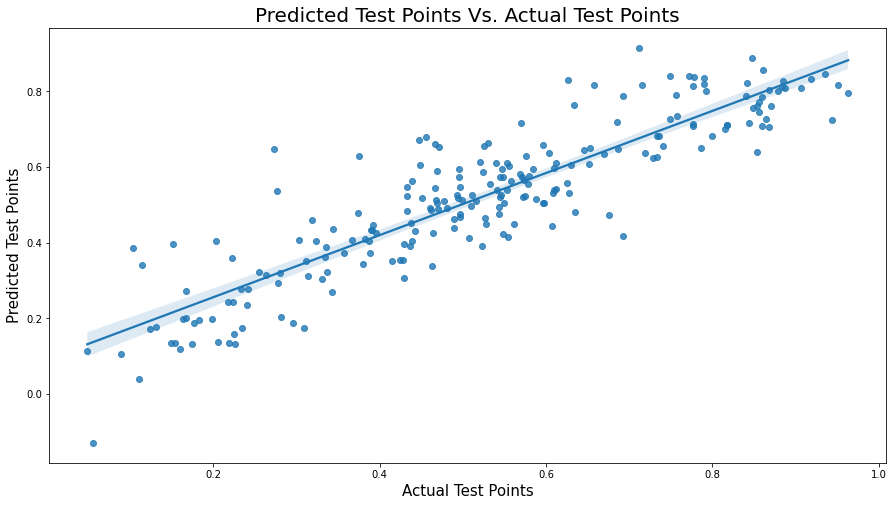

In [1217]:
fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)
corr_plot = sns.regplot(x=y_test, y=y_pred,ax=ax)
plt.title('Predicted Test Points Vs. Actual Test Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Test Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Test Points', fontdict={'fontsize': 15})
plt.show()

In [1218]:
y_pred.head()

184    0.418804
535    0.915556
299    0.406834
221    0.594415
152    0.580668
dtype: float64

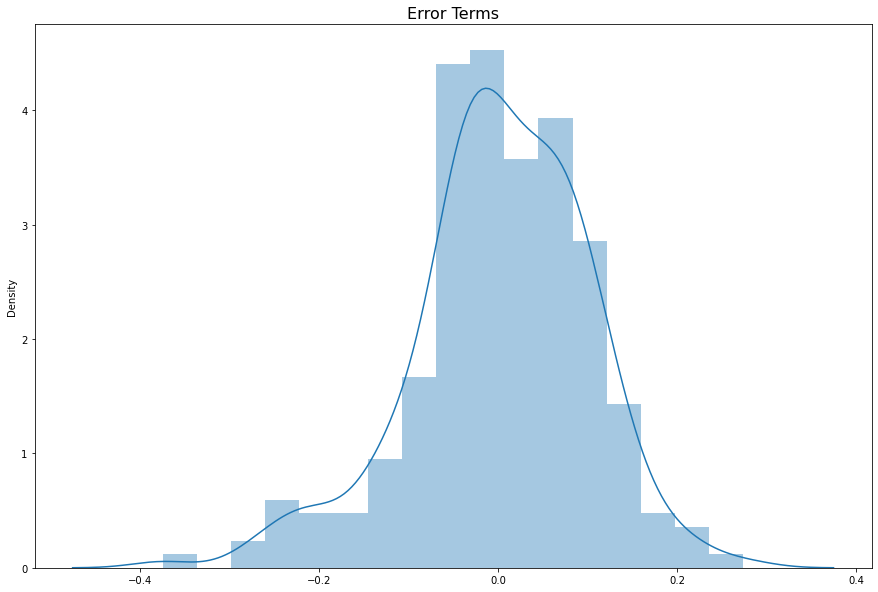

In [1219]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
res_test = y_test - y_pred
plt.title('Error Terms', fontsize=16) 
sns.distplot(res_test)
plt.show()

**Inference:** Distribution plot of error term shows the normal distribution with mean at Zero.

Generating R-Square

In [1220]:
r2_score = r2_score(y_test, y_pred)
r2_score

0.797331498623773

Generating Adjusted R2

In [1221]:
X_test_new.shape

(220, 12)

In [1222]:
n= X_test_new.shape[0]
n

220

In [1223]:
p = X_test_new.shape[1]
p

12

In [1224]:
adjusted_r2 = 1-(1-r2_score)*(n-1)/(n-p-1)
adjusted_r2

0.7855825999932671

In [1225]:
# Mean Sqare Error
mse = mean_squared_error(y_test, y_pred)
print('Mean_Squared_Error :' ,round(mse,4))

Mean_Squared_Error : 0.0097


# Final Report on Test & Train

-  **Train R^2** : 0.8384 [Train values results are taken from Model-5]
-  **Train Adjusted R^2** :0.8287 [Train values results are taken from Model-5]
-  **Test R^2** :0.7973
-  **Test Adjusted R^2** :0.7856
-  This seems to be a decent model that can very well 'Generalize' various datasets.

In [1234]:
lr5_model.params

const               0.080941
yr                  0.232844
workingday          0.054605
temp                0.520838
windspeed          -0.151781
season_2            0.101039
season_4            0.137942
mnth_8              0.051225
mnth_9              0.111729
weekday_6           0.065324
weathersit_light   -0.285973
weathersit_mist    -0.082579
dtype: float64

**Conclusion**
-  We can conclude that the model Model-5 fit isn't by chance, and has descent predictive power.

As per final Model, the top 3 predictor variables that influences the bike booking are:
  - **temp, yr and mnth_8**
  - A unit increase in temp(Temperature) variable increase the bike hire numbers by 0.520838 units.
  - A unit increase in mnth_8 variable increase the bike hire numbers by 0.051225 units.
  - A unit increase in yr(Year) variable increase the bike hire numbers by 0.232844 units.
So it recommended to give above variables utmost importance while planning to achieve maximum demand.

Also, next best variable to be considered:
-  windspeed - A coefficient value of ‘-0.151781’ indicated that a unit increase in windspeed variable decreases the bike hire numbers by 0.151781 units

The equation of our best fitted line is:

**CNT(Target variable) = 0.080941 + (yr × 0.232844) + (workingday * 0.054605) + (temp * 0.520838) - (windspeed * 0.151781) + (season_2 * 0.101039) + (season_4 * 0.137942) + (mnth_8 * 0.051225) + (mnth_9 * 0.111729) + (weekday_6 * 0.065324) - (weathersit_light * 0.285973) - (weathersit_mist * 0.082579)**